## 2. Раст популарности и конкуренције на Олимпијским играма

Пре него што се упустимо у специфичнија питања која се тичу медаља, спортисткиња и спортиста, проверићемо како су се Олимпијске игре мењале кроз време. На основу података које имамо, можемо истражити како се мењао број земаља учесница игара, а затим и како се мењао број такмичарки и такмичара, број спортова и спортских дисциплина, број додељених медаља и слично.

Да ли имате неке претпоставке о овим бројевима? Да ли мислите да је број земаља опадао, растао, остао исти? А спортови? Да ли мислите да се списак спортова мењао током олимпијске историје? Слично, да ли очекујете да се број такмичарки и такмичара мењао?
*Размислите пар тренутака о овим питањима и одговорима који вам можда падају на памет на основу праћења медијских натписа или претходног интересовања за олимпијске игре.*

In [1]:
import pandas as pd # biblioteka za učitavanje i manipulaciju tabelarnih podataka
import matplotlib.pyplot as plt # biblioteka za vizuelizaciju podataka

<details>    
<summary>
    <font color="darkgreen"><b>На основу описа података у претходном поглављу, коју од табела очекујете да учитамо?</b></font>
</summary>
Учитаћемо табелу о историји летњих олимпијских игара која садржи податке о учесницима на олимпијадама почев од 1896 године.

Ову анализу ћемо спровести на летњим олимпијским играма (зимске игре можете анализирати на исти начин, чак користећи исту радну свеску са изменом овог дела кода при учитавању података), класичним учитавањем `.csv` фајла уз помоћ [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) функције:

In [2]:
letnje_igre = pd.read_csv('sport_podaci/letnje_olimpijske_igre_do_2014.csv') #učitavanje podataka iz lokalnog foldera
letnje_igre.head(2) #pregled prva dva reda

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


Табела садржи уносе са појединачним такмичарима, учесницима игара, а нека од наших питања тичу се неких групних податаке, на пример колико је било укупно спортиста или држава у одређеној години, видећемо како то да решимо. За почетак погледајмо једну годину, нпр. 1988. Из тебеле можемо издвојити само део података који се тиче тих игара. То радимо коришћењем услова (нпр. `letnje_igre.Year==1988`) у угластим заградама табеле, хајде да видимо прво шта је резултат овог услова:

In [3]:
letnje_igre.Year==1988

0         False
1         False
2         False
3         False
4         False
          ...  
208859    False
208860    False
208861    False
208862    False
208863    False
Name: Year, Length: 208864, dtype: bool

Као што смо можда претпоставили, резултат ове команде је низ вредности тачно/нетачно зависно од тога да ли се у том реду табеле у колони године `Year` налази вредност 1988 (када је резултат `True`) или нека друга (када је резултат извршене операције `False`). Када се овај услов нађе у угластим заградама које прате име табеле (нпр. `letnje_igre[letnje_igre.Year==1988]`) резултат је исечак из табеле, тј. они редови из табеле за које је услов тачан:

In [4]:
# letnje_igre[letnje_igre.Year==1988] # cela tabela za koju je uslov tacan, probajte i ovo
letnje_igre[letnje_igre.Year==1988].head(5) # prvih pet redova izdvojene tabele da ne bismo zatrpali svesku ogromnom tabelom

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
81,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
144,106,Agostino Abbagnale,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
148,107,Carmine Abbagnale,M,26.0,182.0,90.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxed Pairs,Gold
153,108,Giuseppe Abbagnale,M,29.0,187.0,97.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxed Pairs,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208808,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,21.0,200.0,93.0,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Volleyball,Volleyball Men's Volleyball,NaN
208833,135545,Henk Jan Zwolle,M,23.0,197.0,93.0,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Single Sculls,NaN
208846,135554,Bogusaw Zych,M,36.0,182.0,82.0,Poland,POL,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's Foil, Individual",NaN
208847,135554,Bogusaw Zych,M,36.0,182.0,82.0,Poland,POL,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's Foil, Team",NaN


Када је табела коју сте издвојили условом велика као ова, добијете само део приказа а ако скролујете до дна можете видети број редова.

Када издвајате делове табеле, типично користите синтаксу попут ове наведене изнад `ime_tabele[uslov]` где услов може бити једноставан као у претходном примеру (тачан садржај неке колоне), а може бити и низ услова за различите колоне. На исти начин може се издвојити и једна колона, тада у угластим заградама уместо услова користимо име колоне (нпр. `letnje_igre['Sport']`). Међутим у претходном примеру, колони смо приступали без угластих заграда тј. користећи `letnje_igre.Year`, што је мало краћи начин који је доступан када год у имену колоне нема неких недозвољених карактера (нпр. размак или други карактери које не бисте могли ставити ни у [име пајтон променљиве](https://petlja.org/biblioteka/r/lekcije/TxtProgInPythonSrLat/02_console-02_console_02_programs)).

Издвојене податке можемо сачувати у нову променљиву ако планирамо да истражимо још нешто за исту годину, на пример да видимо колико има вредности у свакој од колона користећи функцију [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html):

In [5]:
letnje_igre1988 = letnje_igre[letnje_igre.Year==1988] # izdvajamo samo one redove kojima je vrednost u koloni godina (Year) jednaka 2016
letnje_igre1988.info(5) # prikaz informacija o sadržaju kolona nove tabele

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 40 to 208848
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      12037 non-null  int64  
 1   Name    12037 non-null  object 
 2   Sex     12037 non-null  object 
 3   Age     11931 non-null  float64
 4   Height  11719 non-null  float64
 5   Weight  11730 non-null  float64
 6   Team    12037 non-null  object 
 7   NOC     12037 non-null  object 
 8   Games   12037 non-null  object 
 9   Year    12037 non-null  int64  
 10  Season  12037 non-null  object 
 11  City    12037 non-null  object 
 12  Sport   12037 non-null  object 
 13  Event   12037 non-null  object 
 14  Medal   1582 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.5+ MB


Да бисмо сазнали колико тимова се такмичило, из ове табеле можемо издвојити различитe државe учеснице користећи функцију [unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) на колони `NOC`, тј. издвајамо јединствене вредности (енг. unique) националних организационионих комитета (енг. National Olympic Committee) који су послали своје представнике на олимпијске игре:

In [6]:
letnje_igre1988.NOC.unique() # jedinstvene vrednosti u koloni NOC letnjih igara 1988

array(['NED', 'BUL', 'ITA', 'LIB', 'EGY', 'ALG', 'DJI', 'MDV', 'YAR',
       'UAE', 'NGR', 'KUW', 'URS', 'JPN', 'ESP', 'SWE', 'GDR', 'TUN',
       'IRQ', 'NIG', 'LBA', 'HUN', 'IND', 'GUY', 'POR', 'FRA', 'USA',
       'FRG', 'KEN', 'JOR', 'URU', 'MAR', 'CMR', 'UGA', 'BRA', 'MEX',
       'MTN', 'TCH', 'VIN', 'GBR', 'PUR', 'AUS', 'JAM', 'PHI', 'SOM',
       'GHA', 'INA', 'SUI', 'IRI', 'PAK', 'HAI', 'MLT', 'ARG', 'TOG',
       'CRC', 'CHI', 'YMD', 'FIN', 'TUR', 'TAN', 'KSA', 'SYR', 'OMA',
       'BRN', 'QAT', 'BAN', 'BEN', 'COL', 'CAN', 'DOM', 'GRE', 'BER',
       'SAM', 'NOR', 'PER', 'MAS', 'CAF', 'YUG', 'ISR', 'COD', 'KOR',
       'GUM', 'NZL', 'ROU', 'SGP', 'HON', 'SUD', 'AUT', 'BEL', 'GUA',
       'ISL', 'MOZ', 'LUX', 'IVB', 'FIJ', 'SUR', 'BAR', 'SEN', 'HKG',
       'PNG', 'ESA', 'MGL', 'CYP', 'CIV', 'MAW', 'GUI', 'CAY', 'ISV',
       'ZIM', 'POL', 'DEN', 'ANG', 'NEP', 'LIE', 'MON', 'SOL', 'BOL',
       'BIZ', 'CGO', 'SMR', 'LBR', 'AHO', 'PAR', 'VEN', 'SRI', 'GEQ',
       'GAB', 'ANT',

Функције попут претходно примењене `unique` можете примењивати и овако `pd.unique(letnje_igre1988.NOC)` (где смо на почетак имена функције додали и скраћено име библиотеке `pandas` које смо додали при учитавању `pd`), форма коју смо искористили изнад ће бити чешће коришћена у наставку зато што је редослед примењивања функција прегледнији поготово када користимо више функција.

Док уопотребом фунције `len()` можемо добити дужину ове листе различитих националних комитета, тј. сазнати колико се различитих тимова такмичило на олимпијади 1988:

In [7]:
len(letnje_igre1988.NOC.unique())

159

Овај податак можемо потврдити интернет претрагом  или на [википедији](https://en.wikipedia.org/wiki/1988_Summer_Olympics) коју ћемо и у наставку често користити за додатну проверу информација или занимљивих чињеница о Олимпијским играма. Одабрали смо као извор википедију зато што су догађаји попут олимпијских игара такви да генеришу пуно интересовања и стога сваки чланак о играма има пуно независних аутора и уредника чланака па сматрамо да је веродостојност информација често вишестрано потврђена. Свакако када вас нека тема посебно заинтригира, истражите и листу извора на крају вики чланка или наставите даље са интернет претрагом.

Сада бисмо волели да видимо овај број (различитих нок тимова) за све године које имамо у подацима. То се може урадити тако што ћемо нпр. [`for` петљом](https://petlja.org/biblioteka/r/lekcije/TxtProgInPythonSrLat/02_console-02_console_10_scripting) пролазити кроз све доступне године и понављати претходни поступак и чувати резултате. Међутим, овде ћемо искортистити други метод који је својственији табеларним подацима и `pandas` библиотеци. У питању је функција груписања [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) коју ћемо искористити да на основу табеле `letnje_igre` направимо низ подтабела које у свим својим редовима имају исту вредност године одржавања. То радимо овако `letnje_igre.groupby(['Year'])`. Међутим, ми не желимо да само групишемо податке по годинама, већ желимо да у оквиру сваке од тих подгрупа нађемо колико има јединствених националних комитета, што можемо и урадити:

In [8]:
letnje_igre.groupby(['Year'])['NOC'].unique() # na ovaj način dobijamo za svaku godinu listu jedinstvenih NOK-ova

Year
1896    [GRE, GBR, SUI, USA, GER, FRA, HUN, AUS, AUT, ...
1900    [DEN, GER, USA, FRA, AUT, NOR, GBR, ITA, BEL, ...
1904    [USA, CAN, ITA, GER, CUB, FRA, GBR, HUN, GRE, ...
1906    [GRE, GER, GBR, FIN, ITA, DEN, NOR, SWE, CRT, ...
1908    [ITA, GER, GBR, USA, SWE, DEN, ANZ, FRA, NOR, ...
1912    [FIN, NOR, SWE, GER, GBR, LUX, FRA, HUN, USA, ...
1920    [DEN, FIN, NOR, EGY, GBR, SWE, ESP, USA, SUI, ...
1924    [FIN, NOR, BUL, CHI, SUI, MON, GBR, FRA, BEL, ...
1928    [NOR, EGY, USA, IND, SUI, GER, GBR, CAN, SWE, ...
1932    [NED, USA, BEL, FRA, PHI, ITA, FIN, SWE, GBR, ...
1936    [EST, NOR, HUN, ITA, EGY, JPN, MON, GBR, ROU, ...
1948    [FIN, NOR, IRI, EGY, PAK, MON, URU, SWE, TUR, ...
1952    [FIN, NOR, EGY, FRA, PAK, MON, ESP, SWE, ROU, ...
1956    [NOR, FRA, BUL, RSA, AFG, NZL, BEL, AUS, PHI, ...
1960    [NOR, BUL, UAR, SUD, IRQ, PAK, JPN, ISR, SWE, ...
1964    [URS, IRQ, EGY, TAN, PAK, SWE, PER, JPN, GHA, ...
1968    [NOR, CMR, MEX, SUD, MAS, NGR, PHI, JPN, ARG, ...
1972    [

Добили смо сада за сваку годину, листу јединствених националних олимпијских комитета, међутим, то нам је превише информација, ми заправо хоћемо само да знамо колико их је, не и који су. То можемо урадити уз помоћ функције [len](https://petlja.org/biblioteka/r/lekcije/TxtProgInPythonSrLat/02_console-02_console_13_list), али зато што хоћемо да знамо дужину листе за сваку годину, тј. у свакој ћелији ове мале табеле, то у оквиру `pandas` библиотеке можемо урадити функцијом [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). Ова функција је моћан алат зато што нам дозвољава да разне друге функције које смо или ми написали или знамо да већ постоје применимо на сваку ћелију у колони табеле (или шире). Не брините ако вам ово сад звучи као да је превише, лако ћете се навићи на то, за сад можете само прочитати ове команде као низ инструкција - издвоји листу јединствених комитета и примени (енг. *apply*) функцију која рачуна дужину - и то је управо то што радимо:

In [9]:
broj_nok = letnje_igre.groupby(['Year'])['NOC'].unique().apply(len) # korišćenjem apply(len) komuniciramo da u svakom redu treba nad listom u ćeliji primeniti funkciju len
broj_nok.head()

Year
1896    12
1900    31
1904    15
1906    21
1908    22
Name: NOC, dtype: int64

Резултат `groupby` фунције је увек табела индексирана по колони која је задата за груписање, у овом случају пошто поред индекса постоји само једна колона са подацима у питању је тип података [серија](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (практично табела која има само једну колону), што можете видети овако:

In [10]:
type(broj_nok)

pandas.core.series.Series

Хаје да већ ове податке које смо пребројали нацртамо и кренемо у дискусију о визуализацији података од једноставнијих графика. За цртање у наставку користићемо олимпијске боје из логоа:
<img src="sport_slike/Olympic_flag.svg" alt="alt text" width="200"/>
За увод о коришћењу боја у пајтону, можете погледати [овај линк](https://petlja.org/biblioteka/r/lekcije/pygame/crtanje-cas1), али типично ћемо боје задавати или користећи њихова имена (попут `red`, `grey`, али и `tomato`, `оlive`, листу именованих боја у оквиру `matplotlib` библиотеке можете пронаћи [овде](https://matplotlib.org/stable/gallery/color/named_colors.html)) или користећи хексадекадни код (шест карактера од 0 до F који једнозначно указују на жељену боју) боја који можете пронаћи на пример [овде](https://g.co/kgs/fRV97K). Олимпијске боје које смо пронашли ћемо сачувати у променљиве за даље коришћење:

In [11]:
#definišemo boje koje ćemo koristiti u nastavku:
olimpijska_plava='#0286c3'
olimpijska_zuta='#fbb22e'
olimpijska_crna='#000000'
olimpijska_zelena='#168c39'
olimpijska_crvena='#ee2f4d'

Број земаља које су се такмичиле сваке олимпијске године можемо и представити линијским дијаграмом у оквиру `pandas` библиотеке функцијом [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). Подразумевани график, када се користи ова функција, је линијски дијаграм који повезује све податке:

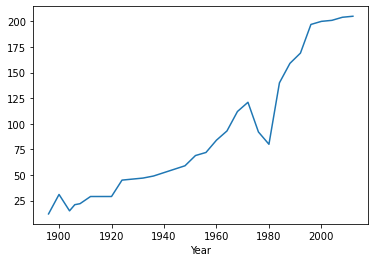

In [12]:
# osnovna slika
broj_nok.plot() # funkcija plot crta linijski dijagram, a dodatno smo definisali oblik markera i boju linije i markera
plt.show() # prikaz dobijenog grafika

Када су подаци само спојени није лако схватити који су то били тренуци у којима је дошло до њиховог бележења (у овом случају године одржавања Олимпијских игара). То није згодно зато што заваравамо читаоца који може помислити да се Олимпијске игре одржавају сваке године, а можда и чешће!
Зато је згодно да на линијским дијаграмима (поготово када немате пуно тачака) истакнете кружићима (или другим ознакама) тачне позиције забележених податка. Свака истакнута тачка је пар из наше табеле - година (х координата) и број држава које су се такмичиле (у координата). Истицање дефинишемо прослеђивањем жељене ознаке кроз аргумент функције `marker`. Све остале тачке (дуж нацртане линије) нису део података, већ линије које спајају наше податке:

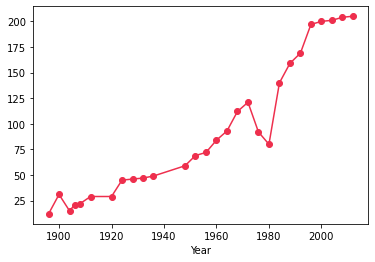

In [13]:
# dodavanje boje i oznaka
broj_nok.plot(marker='o',color=olimpijska_crvena) # funkcija plot crta linijski dijagram, a dodatno smo definisali oblik markera i boju linije i markera
plt.show() # prikaz dobijenog grafika

Додали смо и олимпијску црвену боју овој линији! Предност функције `plot` у оквиру `pandas` библиотеке је што на основу података већ закључује неке ствари и тако иако нисмо дефинисали име х осе, на основу имена колоне смо добили ознаку 'Year'. Међутим, ми бисмо волели да су имена оса на српском језику, па ћемо именима х и у осе дати мало описнија имена уз помоћ функција [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) и [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) библиотеке `matplotlib.pyplot` (чије смо име при учитавању скратили на `plt` па је сада само то име потребно написати испред функција):

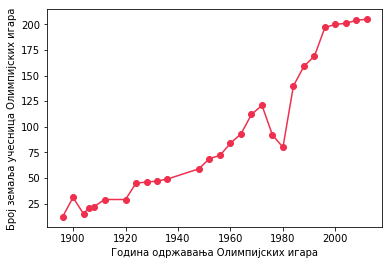

In [14]:
broj_nok.plot(marker='o',color=olimpijska_crvena) # funkcija plot crta linijski dijagram, a dodatno smo definisali oblik markera i boju linije i markera
#dodavanje naziva x i y ose
plt.xlabel('Година одржавања Олимпијских игара')
plt.ylabel('Број земаља учесница Олимпијских игара') # dodajemo ime u ose
plt.show() # prikaz dobijenog grafika

Иако нам се чини да већ на овом графику вредности на у оси почињу од 0 (или барем од вредности врло близу 0), често је згодно експлицитно обезбедити да је то тачно, тј. да је 0 на у оси део приказаног графикона. Обезбедићемо то у наставку функцијом [ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) и додати усправне линије на позицији пар важних година:

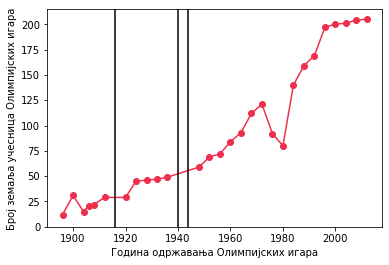

In [15]:
broj_nok.plot(marker='o',color=olimpijska_crvena) # funkcija plot crta linijski dijagram, a dodatno smo definisali oblik markera i boju linije i markera
plt.xlabel('Година одржавања Олимпијских игара')
plt.ylabel('Број земаља учесница Олимпијских игара') # dodajemo ime у ose

plt.ylim(0) # biramo da u osa počinje od 0

# dodajemo uspravne linije za godine kada znamo da su Olimpijske igre otkazane zbog svetskih ratova
plt.axvline(1916,color=olimpijska_crna) 
plt.axvline(1940,color=olimpijska_crna)
plt.axvline(1944,color=olimpijska_crna)

plt.show() # prikaz dobijenog grafika

Видимо да је током већег дела историје Олимпијских игара број држава учесница растао, што је можда и очекивано што због раста популарности игара, што због настајања нових држава током двадесетог века. Међутим, видимо и пар тачака када се одступа од овог тренда а ради се о Олимпијским играма 1976 и 1980 када је било значајно мање земаља учесница. Ово може бити сигнал да нешто није у реду са нашим подацима. Mеђутим, верни пратиоци и познаваоци Олимпијских игара ће знати да нема проблема у подацима - из различитих политичких и економских разлога је преко двадесет (1976) и преко шездесет (1980) земаља бојкотовало учешће у Олимпијским играма, више о томе можете прочитати [овде](https://en.wikipedia.org/wiki/1980_Summer_Olympics_boycott).

Усправне црне линије су додате за године када су планиране олимпијске игре али се нису догодиле због светских ратова.

<details>    
<summary>
    <font color="darkgreen"><b>На сличан начин можемо истражити како се мењао број такмичарки и такмичара на олимпијским играма. Ако испратимо логику груписања по години и бројања уникатних уноса у овом случају користећи колону име, наићи ћемо на проблем, имате ли идеју који?
        </b>
</font>
</summary>
Иако то није превише често, дешава се да више различитих особа има исто име и презиме. 

Издвојимо све уносе у табели који у колони име `Name` имају вредности "Иван Иванов". Зарад лакшег прегледа, овај сегмент табеле сортирамо по колони година користећи функцију [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html):

In [16]:
letnje_igre[letnje_igre.Name =='Ivan Ivanov'].sort_values(by='Year') 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80925,52802,Ivan Ivanov,M,21.0,188.0,82.0,Bulgaria,BUL,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
80930,52808,Ivan Ivanov,M,24.0,177.0,64.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 800 metres,NaN
80931,52808,Ivan Ivanov,M,24.0,177.0,64.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,"Athletics Men's 1,500 metres",NaN
80937,52812,Ivan Ivanov,M,21.0,185.0,75.0,Kyrgyzstan,KGZ,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 400 metres Freestyle,NaN
80938,52812,Ivan Ivanov,M,21.0,185.0,75.0,Kyrgyzstan,KGZ,2000 Summer,2000,Summer,Sydney,Swimming,"Swimming Men's 1,500 metres Freestyle",NaN
80939,52812,Ivan Ivanov,M,21.0,185.0,75.0,Kyrgyzstan,KGZ,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN
80928,52805,Ivan Ivanov,M,21.0,192.0,107.0,Bulgaria,BUL,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",NaN


Видимо у подацима више уноса који садрже податке о спортисти Ивану Ивановом. Користећи остале информације на располагању (попут висине, масе, година, припадности тиму) видимо да је у случају Олипијских игара у Сиднеју, у питању једна иста особа која се такмичила у више категорија, док на пример у случају Олипијских игара 1972. године видимо да су у питању две особе. Када бисмо спровели груписање по години и бројали јединствена имена, за сваку од ових година (1972,2000,2008) бисмо издвојили само једног Ивана Иванова и тиме бисмо заборавили на једну особу која се такмичина 1972 године. Видите то у овом малом примеру:

In [17]:
ivan_ivanov = letnje_igre[letnje_igre.Name =='Ivan Ivanov'] # izdvajamo podatke o sportistima koji se zovu Ivan Ivanov i čuvamo ih u novoj promenljivoj
ivan_ivanov.groupby('Year')['Name'].unique().apply(len) # grupišemo po godini i brojimu jedinstvena imena, što bi nam bila prva ideja da izbrojimo učesnike igara 

Year
1972    1
2000    1
2008    1
Name: Name, dtype: int64

Међутим, у примеру табеле са подацима о спортистима који се зову Иван Иванов, можемо приметити постојање колоне `ID` која је јединствени идентификатор за особе које су учествовале на Олимпијским играма. Видимо да две различите особе које смо идентификовали са истим именом Иван Иванов имају различиту вредност у овом пољу, док уноси које смо идентификовали као оне који одговарају истој особи (користећи податке о маси, годинама и слично) имају исте `ID` вредности.
Стога ћемо за бројање спортиста учесника Олимпијских игара избројати груписањем по колони `ID`:

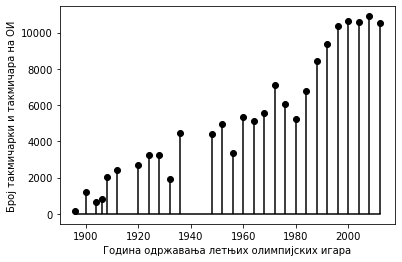

In [18]:
broj_osoba_na_oi = letnje_igre.groupby(['Year'])['ID'].unique().apply(len) # grupisanje na osnovu godine i prebrojavanje razlicitih ID vrednosti
plt.stem(broj_osoba_na_oi.index,broj_osoba_na_oi, linefmt='k',markerfmt='ko',basefmt='k') # crtanje stem (lizalica) dijagrama
plt.xlabel('Година одржавања летњих олимпијских игара') # ime x ose
plt.ylabel('Број такмичарки и такмичара на ОИ') # ime y ose
plt.show()

Видимо да је и број такмичарки и такмичара на олимпијским играма током већег дела времена растао. Чак пад у броју различитих земаља учесница који смо видели у годинама 1976 и 1980 изгледа далеко мање у овим подацима (вероватно је број учесника по земљама био већи, како бисмо то проверили?).

На претходном графику (на коме смо приказали број држава учесница олипијских игара) спајањем тачкица могла вам је промаћи информација о томе колико често се дешавају летње олимпијске игре. Са овом врстом визуализације која се популарно зове и "лизалица" (енг. *lollipop*) доста лакше примећујемо да су свака две уноса (два одржавања олимпијских игара) једнако удаљена (што ако пратимо ОИ већ знамо да износи 4 године), али и лакше примећујемо периоде кад се игре нису одржале, или када су се одржале нешто пре него што је "требало". Ако погледате сам почетак 20. века, видимо да је густина лизалица нешто већа него касније, хајде да видимо када су се одржавале олимпијске игре тада:

In [19]:
data_segment = letnje_igre[(letnje_igre.Year>1900)&(letnje_igre.Year<1920)] # izdvajamo samo OI između 1900 i 1920 god
data_segment.Year.unique() # u izdvojenom segmentu podataka, tražimo jedinstvene vrednosti u koloni godine:

array([1912, 1906, 1904, 1908], dtype=int64)

Видимо да постоје олимпијске игре одржане 1906 године, које нарушавају четворогодишњу периодичност. Ово опет може бити извор дилеме да ли су подаци веродостојни, али википедија нам опет може помоћи да научимо да су се [олимпијске игре заиста одржале и 1906 године](https://en.wikipedia.org/wiki/1906_Intercalated_Games) у Атини.

Претходно искоришћени лизалица график ([`plt.stem`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html)) је заправо доста сличан стубичастом дијаграму који бисте такође могли нацртати (користећи функцију [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)). Оно што је различито је постојање маркера на врху стубића који помажу да испратимо евентуални тренд међу подацима (за шта смо претходно користили спајање тачкица). Дијаграми који комбинују линије и тачкице попут лизалица графика су често корисни и да прикажемо како се разлика између неке две вредности повећава или смањује тако што ћемо цртати дужи са маркерима на обе стране. Подаци о такмичарима и такмичаркама су баш такви подаци, хајде да их нацртамо и видимо како то изгледа.

За почетак ћемо направити одговарајуће подскупове користећи вредност у колони пол (енг. *Sex*), а затим применити исто груписање и бројање јединствених учесника по колони `ID`:

In [20]:
takmicari = letnje_igre[letnje_igre.Sex=='M'] # izdvajamo redove tabele u kojima je u koloni pol M
broj_takmicara_oi = takmicari.groupby(['Year'])['ID'].unique().apply(len) # primenjujemo grupisanje po godini i brojanje jedinstvenih takmičara

takmicarke = letnje_igre[letnje_igre.Sex=='F'] # izdvajamo redove tabele u kojima je u koloni pol F
broj_takmicarki_oi = takmicarke.groupby(['Year'])['ID'].unique().apply(len) # grupisanje po godini i brojanje jedinstvenih takmičarki

Ове податке ћемо сада представити користећи комибинацију функција [vlines](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html) (за цртање усправних линија) и [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) (за цртање тачкастих дијаграма). Усправне линије ћемо нацртати тако да им х координата одговара години одржавања олимпијских игара, а крајње у координате одговарају броју такмичарки, односно такмичара. Коначно, на крајеве ових дужи ћемо додати кружиће (чије х и у координате одговарају годинама и бројевима такмичара, односно такмичарки) да бисмо разлику учинили још уочљивијом:

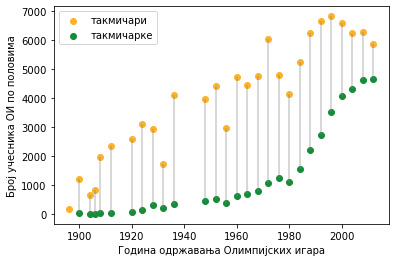

In [21]:
# crtamo uspravne linije za sve održane olimpijske igre 
plt.vlines(x=broj_takmicarki_oi.index, ymin=broj_takmicarki_oi, ymax=broj_takmicara_oi.loc[1900:], color='grey', alpha=0.4)
# broj takmičara crtamo tačkicama (h osa godina, u osa njihov broj te godine)
plt.scatter(x = broj_takmicara_oi.index, y = broj_takmicara_oi, color=olimpijska_zuta, alpha=1, label='такмичари') 
# broj takmičarki crtamo tačkicama druge boje (h osa godina, u osa broj takmičarki te godine)
plt.scatter(x = broj_takmicarki_oi.index, y = broj_takmicarki_oi, color=olimpijska_zelena, alpha=1, label='такмичарке') 

# dodajemo imena x i y ose i legendu
plt.xlabel('Година одржавања Олимпијских игара')
plt.ylabel('Број учесника ОИ по половима')
plt.legend()
plt.show()

Зависно од тога шта желите да комуницирате као главну поруку података ову исту информацију можете нацртати и било којим од претходних графика - број такмичара и такмичарки можете представити линијским дијаграмом, или стубићима (или лизалицама). Међутим овај избор поред тога што приказује како се број појединачних група мењао кроз време, што видимо пратећи кружиће одговарајуће боје, нам јасније истиче њихову разлику (сиве линије) и приказује како се она мењала кроз време.

Анализирајући претходне податке, видимо да су у првој години одржавања Летње олимпијске игре биле намењене само мушкарцима, док је са наредним догађајем број жена почео да расте. На графику видимо да је број жена с почетка врло споро растао, то јест иако су игре брзо почеле да расту (и као што смо видели привлаче све више држава учесница), значајно више је растао број мушких учесника. Интересантно је такође приметити да је пораст броја такмичарки доста стабилнији, док је број такмичара некад растао а некад опадао - видите на пример значајан пад броја такмичара на олимпијадама 1932 и 1956 године, то може бити у вези са ратовима који су претходили или другим историјским дешавањима попут Велике депресије (1932) и Суецке кризе (1956). 

Предност овог графика је што истовремено видимо и тачан број такмичара и такмичарки и линијом истакнуту њихову разлику. Међутим, разлика између учесника два пола од 1000 нема исто значење када је укупан број учесника 1002 (тј. такмиче се једна жена и 1001 мушкарац), и када их је 10000 (тј. такмичи се 4500 жена и 5500 мушкараца). За ово је погодније уместо бројева мушкараца и жена погледати проценуалне заступљености једне и друге групе. Тако ћемо далеко јасније сагледати да ли се јаз између броја мушких и женских учесника олимпијаде смањује.

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Израчунати који проценат учесника олимпијаде су мушког, а који женског пола и репродукујте график у наставку.</div> 

In [1]:
# resenje zadatka, uklonite znake za komentar

# procenat_takmicara = 100*broj_takmicara_oi/broj_osoba_na_oi
# procenat_takmicarki = 100*broj_takmicarki_oi/broj_osoba_na_oi

# plt.vlines(x=procenat_takmicarki.index, ymin=procenat_takmicarki, ymax=procenat_takmicara, color='grey', alpha=0.4)
# plt.scatter(x = procenat_takmicara.index, y = procenat_takmicara, color=olimpijska_zuta, alpha=1, label='такмичари')
# plt.scatter(x = procenat_takmicarki.index, y = procenat_takmicarki, color=olimpijska_zelena, alpha=1, label='такмичарке')

# plt.axhline(y=0,color='grey',alpha=0.2)
# plt.axhline(y=50,color='grey',alpha=0.2)
# plt.axhline(y=100,color='grey',alpha=0.2)
# plt.xlabel('Година одржавања Олимпијских игара')
# plt.ylabel('Порценат учесика мушког и женског пола')
# plt.legend()
# plt.savefig('sport_slike/OI_procenat_zm.png',dpi=300)
# plt.show()

<img src="sport_slike/OI_procenat_zm.png" width="500" align='left'/>

На овом графику сада далеко јасније можемо видети да се током последњих пар деценија проценат такмичарки и такмичара значајно приближио. Графику смо додали и сиве водоравне линије да означимо минималне и максималне вредности и једнаку заступљеност такмичарки и такмичара. Како проценат такмичарки и такмичара у збиру мора бити једнак 100%, могли смо приказати само једну од категорија података, она друга је имплицитно срачуната, то се на овом графику види и на основу симетричног распореда тачкица - што се више проценат мушкараца удаљава од вредности 100% то се проценат жена повећава. Истичући процентуалну разлику сивом усправном линијом додатно смо послали визуелну поруку о смањењу јаза међу заступљеностима група.

Овде је битно напоменути да ми нисмо гледали награђене учеснике и учеснице, већ број особа оба пола који су уопште имали прилику да се такмиче што говори о системским баријерама које су постојале и даље постоје да се и жене такмиче на олимпијским играма. 

Много је различитих разлога заслужно за овакав однос међу бројевима, од тога да у старту олимпијске игре нису биле отворене за жене (попут првих), преко тога да се у неким спортовима тек много касније појавила женска категорија (тек од 2012. године у свим спортовима постоји и женска категорија, али не и у свим дисциплинама), до тога да и када постоје могућности за такмичење за оба пола неке државе нису имале своје представнице (тек 2012. године су све државе које су део интернационалонг олимпијског комитета имале и представнике и представнице на олимпијским играма). Неке од ових ствари можете наставити да истражујете у овом скупу података (нпр. када је који спорт додао и женску категорију, како је мењао број дисциплина у којима се додељују медаље а које су само за мушкарце или само за жене), а неке су дубље културолошки обрасци које морамо испитивати на другим местима. Више о овој теми и повезаним питањима на које можете потражити одговоре у овим подацима можете прочитати [овде](https://en.wikipedia.org/wiki/Participation_of_women_in_the_Olympics).

In [23]:
# resenje o brojevima Menonly i Womenonly eventova

# broj_disciplina = letnje_igre.groupby(['Year'])['Event'].unique().apply(len)
# plt.plot(broj_disciplina.index, broj_disciplina, drawstyle='steps-mid',color=olimpijska_crna)

# broj_disciplina_za_muskarce = letnje_igre[letnje_igre.Event.str.contains('Men')].groupby(['Year'])['Event'].unique().apply(len)
# plt.plot(broj_disciplina_za_muskarce.index, broj_disciplina_za_muskarce, drawstyle='steps-mid',color=olimpijska_zuta)

# broj_disciplina_za_zene = letnje_igre[letnje_igre.Event.str.contains('Women')].groupby(['Year'])['Event'].unique().apply(len)
# plt.plot(broj_disciplina_za_zene.index, broj_disciplina_za_zene, drawstyle='steps-mid',color=olimpijska_zelena)

Сличним методама груписања и бројања можемо истражити и број такмичарских догађаја (колона `Event`, енг. за догађај) у којима се такмичари боре за медаље. Овим бројањем добићемо практично и информацију о броју медаља, ако о кошаркашкој медаљи (или било ком тимском спорту) размишљамо као о једној медаљи за тим, а не као о 5 индивидуалних медаља које сви чланови тима добијају.
То радимо бројећи јединствене вредности у колони `Event`, погледајмо прве вредности ове колоне:

In [24]:
letnje_igre['Event'].head() # ovde smo kolonu pozvali koriscenjem uglastih zagrada, isto radi i letnje_igre.Event

0     Basketball Men's Basketball
1    Judo Men's Extra-Lightweight
2         Football Men's Football
3     Tug-Of-War Men's Tug-Of-War
4    Athletics Women's 100 metres
Name: Event, dtype: object

Понављамо исти метод груписања и бројања, а затим ћемо нацртати податке, овај пут користећи `plt.bar`:

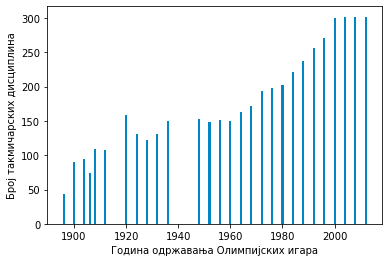

In [25]:
broj_disciplina = letnje_igre.groupby(['Year'])['Event'].unique().apply(len) # broj jedinstvenih takmicarskih dogadjaja u okviru olimpijskih igara

plt.bar(broj_disciplina.index, broj_disciplina, color=olimpijska_plava) # crtamo stubicasti dijagram
plt.xlabel('Година одржавања Олимпијских игара') # ime x ose
plt.ylabel('Број такмичарских дисциплина') # ime y ose
plt.show()

На последњем графику смо испробали још једну опцију визуализације ових временски променљивих података - стубичасти дијаграм. Функцији `bar` проследили смо 2 аргумента (слично као и код претходних функција за цртање), међутим за разлику од `plot` или `scatter` функције код које х координате морају бити нумерчког типа, овде је могуће искористити и категоричке податке на х оси. Међутим, у нашем случају х координате су године одржавања ОИ, стога их и функција за цртање стубића смешта на бројевну праву и поставља одговарајући размак између њих. Због чињенице да имамо преко 20 стубића који су удаљени углавном по 4 године, ширина стубића у овој основној верзији је јако мала, па је мала разлика између овог дијаграма и лизалица које смо цртали раније. Ако међутм искористимо стубичасти дијаграм са `plot` функцијом у оквиру `pandas` библиотеке коришћењем аргумента `kind='bar'` можемо видети да су стубићи шири и једнако удаљени један од другог:

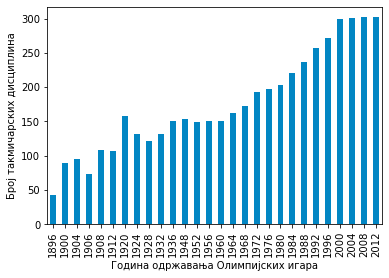

In [26]:
broj_disciplina.plot(kind='bar', color=olimpijska_plava) # crtamo stubicasti dijagram
#i ovo je jedna moguca opcija za prakticno isti dijagram, samo sa drugom bibliotekom plt
#plt.bar(broj_disciplina.index.astype(str), broj_disciplina) 
#plt.xticks(rotation='vertical') # ako iskoristite plt.bar za crtanje, morate iskoristiti i ovu funkciju za rotaciju naziva podeoka na x osi da biste mogli da ih procitate 
plt.xlabel('Година одржавања Олимпијских игара') # ime x ose
plt.ylabel('Број такмичарских дисциплина') # ime y ose
plt.show()

То је зато што у овом случају индексна колона, тј. година одржавања није интерпретирана као број који треба сместити на бројевну праву, већ као назив стубића који је обележен испод сваког стубића. И ово може бити ок приказ ако желимо само да демонстрирамо да је број медаља, тј. дисциплина из којих се додељују медаље, углавном растао током историје олимпијских игара. Треба само бити опрезан око тога да смо на овај начин изгубили информацију о томе да се олимпијаде нису одржавале током ратних година (само ће врло пажљив читалац загледати да ли су вредности година на х оси увек удаљене 4 године једна од друге).

Интересантно је да број дисциплина, односно спортских такмичење у којима се додељују медаље правилније расте и од броја такмичара и од броја држава учесница. Обратите пажњу овде нема толико наглих падова попут година 1980 када је забележен пад држава учесница, или у непосредној близини ратних година као што смо видели у бројевима такмичара. Разлог томе лежи у чињеници да се спортске дисциплине и медаље планирају у организацији Олимпијских игара, независно од тога колико ће се држава појавити у такмичењу (да ли ће неке бојкотовати или не) и колико ће такмичара различите земље послати. Можемо видети да се број медаља стабилизовао тек у последњих пар летњих олимпијских игара које разматрамо у овој анализи.

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Претходно смо пребројали дисциплине у којима се додељују медаље, али у неким дисциплинама то значи да само једна особа добија златну медаљу (нпр. маратон), док у некима то значи да цео тим (нпр. тим одбојкашица) добија по медаљу. Како бисте израчунали колико тачно медаља (нпр. само златних) су припремили организатори сваких летњих олимпијских игара?</div> 

In [27]:
# # resenje

# zlatne_medalje = letnje_igre[letnje_igre.Medal=='Gold']
# zm_god = zlatne_medalje.groupby('Year').size()
# plt.plot(zm_god,marker='o', color=olimpijska_plava)
# plt.show()

# # izgleda da je 20ih bilo dosta vise grupnih sportova, to se moze proveriti i koliko je vise medalja u odnosu na discipline
# #zm_god2 = zm_god/broj_disciplina
# #plt.plot(zm_god2,marker='o')

<div class="alert alert-block alert-info"><img src="sport_slike/zad.png" align="left"/>Користећи исте методе груписања и бројања, како бисте издвојили 10 спортиста који су освојили највише (златних) медаља?</div> 

In [28]:
# # resenje
# # lista id-jeva
# letnje_igre[letnje_igre.Medal.isin(['Gold','Silver','Bronze'])].groupby("ID").size().sort_values(ascending=False)[:10]

In [29]:
# #resenje
# #pregled jednog od id
# letnje_igre[letnje_igre.ID==67046]

In [30]:
# # resenje
# # grupisanje po dve kolone, ali to objasnjavamo tek u sledecoj lekciji
# letnje_igre[letnje_igre.Medal.isin(['Gold','Silver','Bronze'])].groupby(["ID",'Name']).size().sort_values(ascending=False)[:10]